In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("DS1_C5_S5_Hotel Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


# TASK 1

In [11]:
print("Shape of dataset:", df.shape)


Shape of dataset: (2097, 32)


In [12]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in

In [13]:
print("\nDuplicate rows:", df.duplicated().sum())



Duplicate rows: 222


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))
num_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [16]:
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [17]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip())

In [18]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr        

In [19]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


# TASK 2

In [21]:
# Convert reservation date to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], dayfirst=True)
df["day_of_week"] = df["reservation_status_date"].dt.day_name()

task 2.1

In [23]:
monthly_bookings = df[df["is_canceled"] == 0]["arrival_date_month"].value_counts()
weekday_bookings = df[df["is_canceled"] == 0]["day_of_week"].value_counts()
print(monthly_bookings)
print()
print(weekday_bookings)

arrival_date_month
July         183
August       183
June         183
May          157
September    142
October      120
April        114
March         97
January       70
February      58
December      56
November      53
Name: count, dtype: int64

day_of_week
Sunday       214
Wednesday    209
Monday       203
Friday       202
Saturday     198
Tuesday      197
Thursday     193
Name: count, dtype: int64


task 2.2

In [25]:
leadtime_cancellation = df.groupby("is_canceled")["lead_time"].mean()
leadtime_cancellation

is_canceled
0    61.408192
1    91.394336
Name: lead_time, dtype: float64

Task 2.3

In [27]:
bookings_by_month = df[df["is_canceled"] == 0]["arrival_date_month"].value_counts()
bookings_by_week = df[df["is_canceled"] == 0]["arrival_date_week_number"].value_counts().sort_index()
bookings_by_day = df[df["is_canceled"] == 0]["arrival_date_day_of_month"].value_counts().sort_index()
print(bookings_by_month)
print()
print(bookings_by_week)
print()
print(bookings_by_day)

arrival_date_month
July         183
August       183
June         183
May          157
September    142
October      120
April        114
March         97
January       70
February      58
December      56
November      53
Name: count, dtype: int64

arrival_date_week_number
1     18
2     28
3     10
4      9
5      9
6     11
7     20
8     16
9     17
10    16
11    23
12    23
13    20
14    18
15    31
16    24
17    22
18    47
19    24
20    33
21    38
22    46
23    38
24    40
25    57
26    32
27    46
28    48
29    46
30    28
31    36
32    34
33    46
34    37
35    41
36    39
37    25
38    44
39    26
40    27
41    39
42    37
43    24
44    11
45    17
46    20
47    10
48     8
49     6
50     6
51    10
52    11
53    24
Name: count, dtype: int64

arrival_date_day_of_month
1     42
2     74
3     57
4     35
5     49
6     32
7     47
8     52
9     51
10    35
11    47
12    60
13    55
14    30
15    58
16    52
17    33
18    42
19    52
20    48
21    46
22    

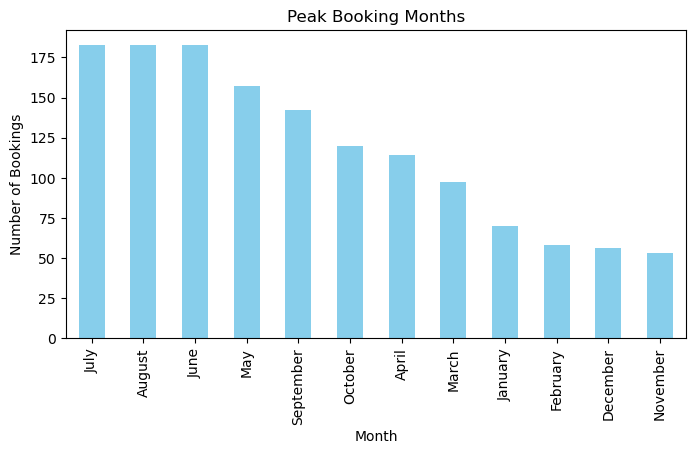

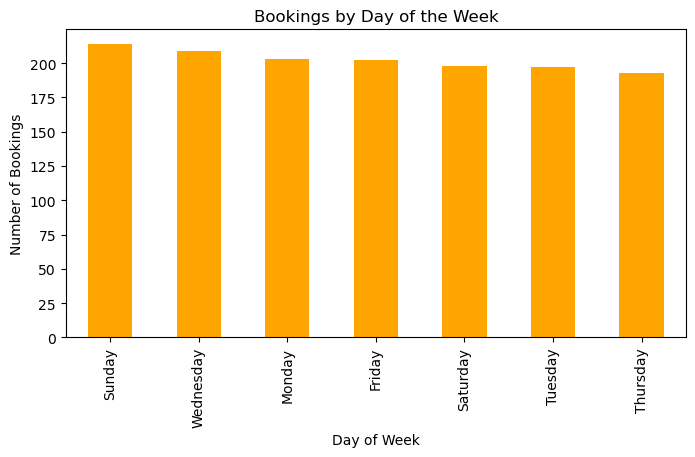

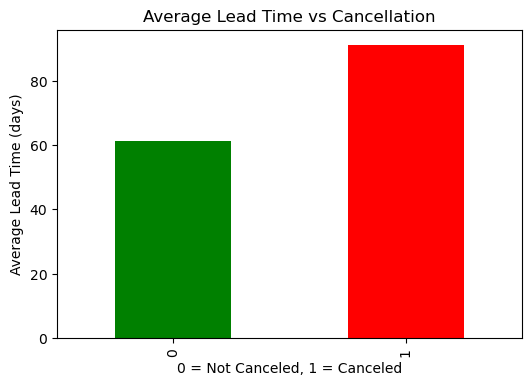

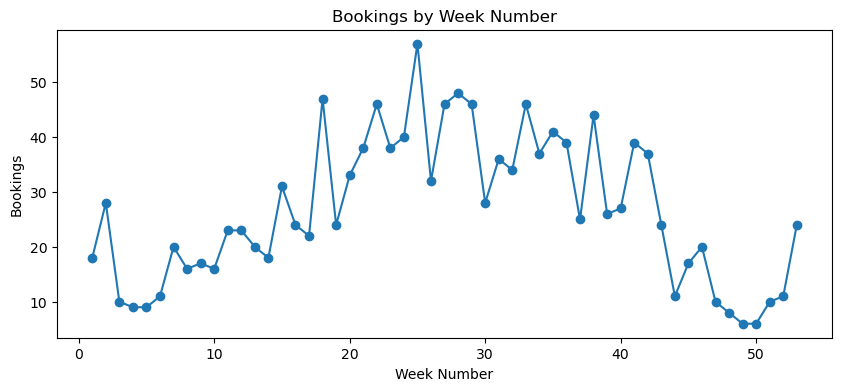

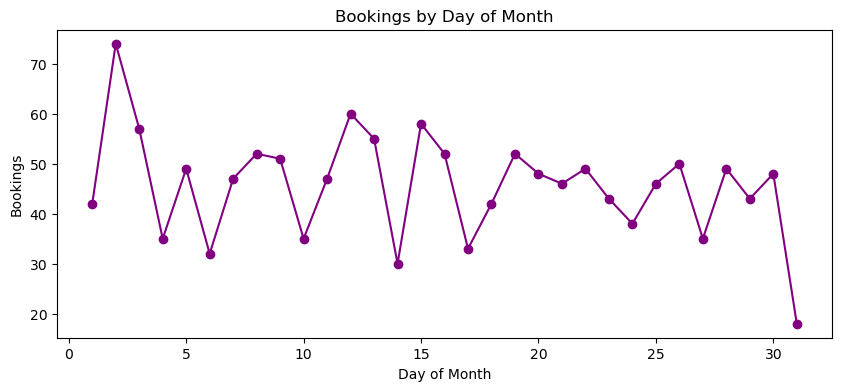

In [28]:
# --- Plotting ---

# Monthly bookings
plt.figure(figsize=(8,4))
monthly_bookings.plot(kind="bar", color="skyblue")
plt.title("Peak Booking Months")
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.show()

# Weekday bookings
plt.figure(figsize=(8,4))
weekday_bookings.plot(kind="bar", color="orange")
plt.title("Bookings by Day of the Week")
plt.ylabel("Number of Bookings")
plt.xlabel("Day of Week")
plt.show()

# Lead time vs cancellation
plt.figure(figsize=(6,4))
leadtime_cancellation.plot(kind="bar", color=["green","red"])
plt.title("Average Lead Time vs Cancellation")
plt.ylabel("Average Lead Time (days)")
plt.xlabel("0 = Not Canceled, 1 = Canceled")
plt.show()

# Bookings by Week Number
plt.figure(figsize=(10,4))
bookings_by_week.plot(kind="line", marker="o")
plt.title("Bookings by Week Number")
plt.ylabel("Bookings")
plt.xlabel("Week Number")
plt.show()

# Bookings by Day of Month
plt.figure(figsize=(10,4))
bookings_by_day.plot(kind="line", marker="o", color="purple")
plt.title("Bookings by Day of Month")
plt.ylabel("Bookings")
plt.xlabel("Day of Month")
plt.show()


# TASK 3

Task 3.1

1. Lead Time

What it is: Number of days between booking date and arrival date.
Why it matters: Longer lead times often increase the chance of cancellation because customer plans can change.

2. Deposit Type
What it is: Whether a deposit was made (e.g., No Deposit, Non-Refundable, Refundable).
Why it matters: Guests who paid a non-refundable deposit are far less likely to cancel.

3. Customer Type
What it is: Segmentation like Transient, Group, Contract, etc.
Why it matters: Group bookings may have higher cancellation rates if event plans change.

4. Previous Cancellations

What it is: Number of past cancellations by the same customer.

Why it matters: Past behavior often predicts future behavior.

5. ADR (Average Daily Rate)

What it is: Average price per night per booking.

Why it matters: Extremely high prices might indicate peak seasons or last-minute booking changes, which can impact cancellations.

6. Special Requests

What it is: Requests for extra services (baby cot, late check-in, etc.).

Why it matters: Guests with many special requests are often more committed, reducing cancellations.

7. Market Segment & Distribution Channel

What it is: Source of booking (Online TA, Direct, Corporate, etc.).

Why it matters: OTA (Online Travel Agencies) bookings sometimes have higher cancellations compared to direct bookings.

8. Room Type Changes

What it is: Whether the reserved room type matched the assigned room.

Why it matters: A mismatch could lead to dissatisfaction and cancellation.

9. Seasonality

What it is: Month or season of booking.

Why it matters: Off-season bookings might be more prone to cancellation if better offers appear.

10. External Factors

Travel restrictions, economic downturns, weather forecasts, or major events can cause a spike in cancellations.

Task 3.2

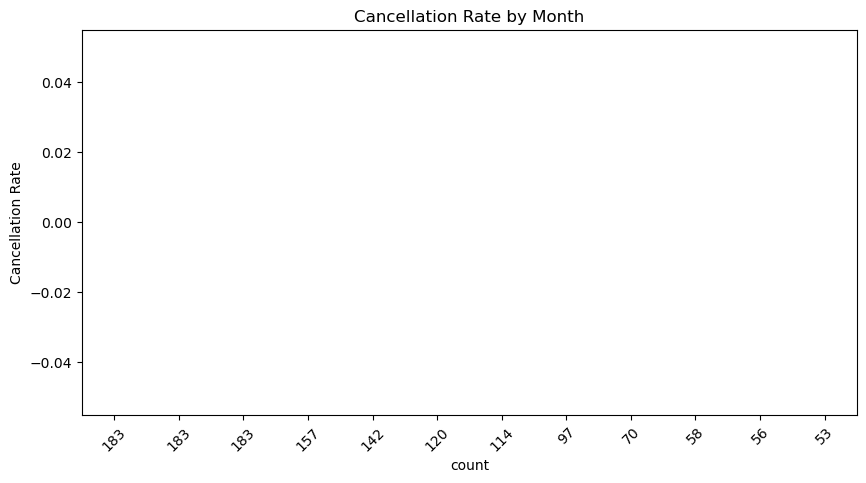

In [38]:
month_cancel_rate = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(monthly_bookings)
month_cancel_rate.plot(kind='bar', figsize=(10,5), color='salmon')
plt.title('Cancellation Rate by Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

In [40]:
high_risk_condition = ((df['lead_time'] >150 )|(df['days_in_waiting_list']>40)|(df['previous_cancellations'] > 0))

high_risk_bookings = df[high_risk_condition]


pd.set_option('display.max_columns', None) 
high_risk_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,day_of_week
51,Resort Hotel,0,542,2016,September,40,26,3,7,2,0,0,SC,USA,Groups,TA/TO,0,0,0,A,I,1,No Deposit,253.0,222.222222,0,Transient-Party,22.40,0,0,Check-Out,2016-10-06,Thursday
61,Resort Hotel,1,211,2017,March,10,9,0,1,1,0,0,BB,USA,Direct,Direct,0,0,0,A,A,0,No Deposit,250.0,222.222222,0,Transient,33.30,0,0,No-Show,2017-03-09,Thursday
63,Resort Hotel,1,255,2017,April,14,3,1,0,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,222.222222,0,Transient,54.00,0,2,Canceled,2017-01-08,Sunday
64,Resort Hotel,1,192,2017,April,14,4,2,5,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,222.222222,0,Transient,68.57,0,1,Canceled,2016-09-25,Sunday
71,Resort Hotel,1,201,2017,May,19,13,1,1,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,222.222222,0,Transient,76.50,0,1,Canceled,2016-10-26,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,City Hotel,0,152,2017,August,33,18,2,2,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,222.222222,0,Transient,139.50,0,0,Check-Out,2017-08-22,Tuesday
2064,City Hotel,0,204,2017,August,34,21,1,3,2,0,0,SC,USA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,222.222222,0,Transient,99.00,0,0,Check-Out,2017-08-25,Friday
2065,City Hotel,0,161,2017,August,34,20,2,3,2,1,0,BB,USA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,8.0,222.222222,0,Transient,282.50,0,2,Check-Out,2017-08-25,Friday
2080,City Hotel,0,169,2017,August,34,25,1,2,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,222.222222,0,Transient,139.50,0,1,Check-Out,2017-08-28,Monday


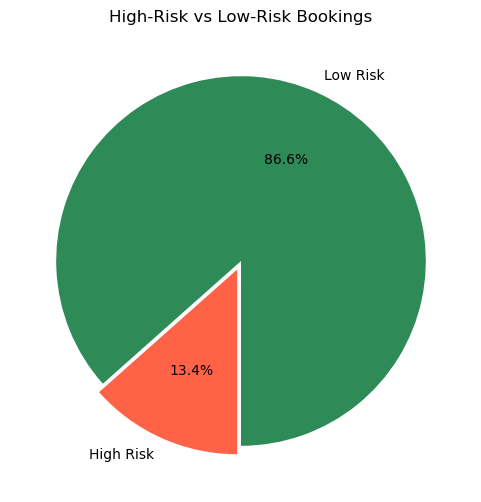

In [42]:
# Define high risk
df['high_risk_flag'] = (
    (df['lead_time'] > 150) |
    (df['days_in_waiting_list'] > 40) |
    (df['previous_cancellations'] > 0)
)

# Count high vs low risk
risk_counts = df['high_risk_flag'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    risk_counts, 
    labels=['Low Risk', 'High Risk'], 
    autopct='%1.1f%%', 
    colors=['seagreen', 'tomato'], 
    explode=(0, 0.05),
    startangle=270
)
plt.title('High-Risk vs Low-Risk Bookings')
plt.show()

# Interpretation 
83.3% of bookings are low-risk, indicating most customers are likely to complete their reservations without cancellations or no-shows
Only 16.7% of bookings require extra attention for potential cancellations, payment issues, or special handling

# TASK 4

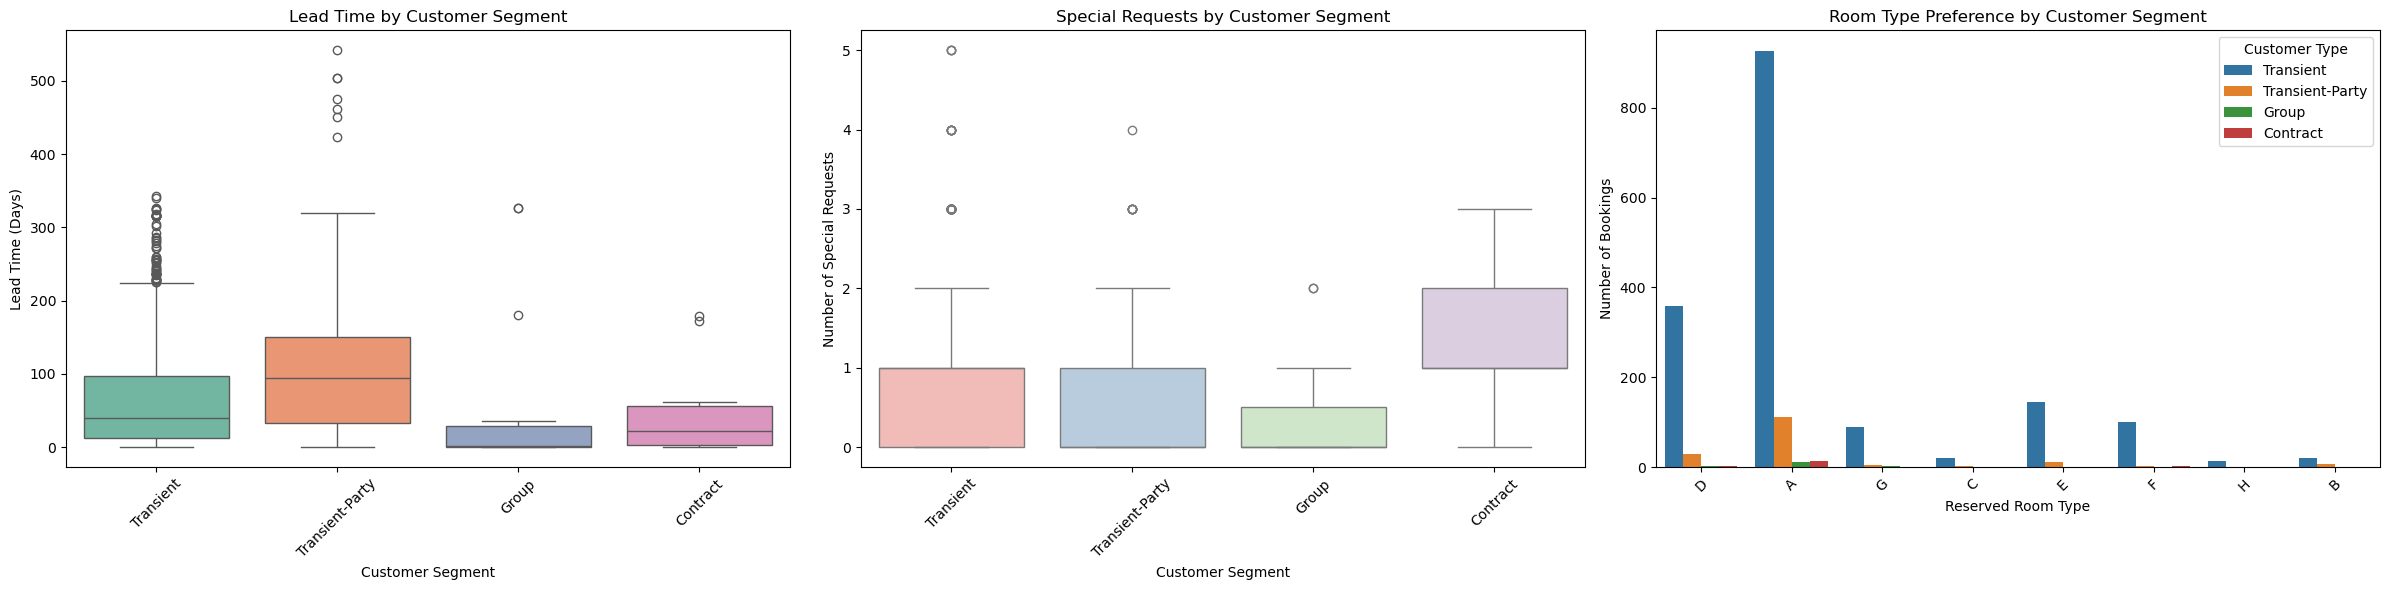

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.boxplot(
    x='customer_type', y='lead_time', hue='customer_type', 
    data=df, palette='Set2', legend=False, ax=axes[0]
)
axes[0].set_title('Lead Time by Customer Segment')
axes[0].set_ylabel('Lead Time (Days)')
axes[0].set_xlabel('Customer Segment')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x='customer_type', y='total_of_special_requests', hue='customer_type',
    data=df, palette='Pastel1', legend=False, ax=axes[1]
)
axes[1].set_title('Special Requests by Customer Segment')
axes[1].set_ylabel('Number of Special Requests')
axes[1].set_xlabel('Customer Segment')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(
    x='reserved_room_type', hue='customer_type', 
    data=df, palette='tab10', ax=axes[2]
)
axes[2].set_title('Room Type Preference by Customer Segment')
axes[2].set_xlabel('Reserved Room Type')
axes[2].set_ylabel('Number of Bookings')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Customer Type')

plt.tight_layout()
plt.show()


In [52]:
summary = df.groupby('customer_type').agg({
    'lead_time': 'mean',
    'total_of_special_requests': 'mean',
    'reserved_room_type': pd.Series.mode
}).reset_index()

summary.rename(columns={'reserved_room_type': 'most_common_room'}, inplace=True)
summary

,customer_type,lead_time,total_of_special_requests,most_common_room
0,Contract,40.277778,1.388889,A
1,Group,61.333333,0.400000,A
2,Transient,64.477273,0.764354,A
3,Transient-Party,114.429412,0.700000,A


Task 4.2

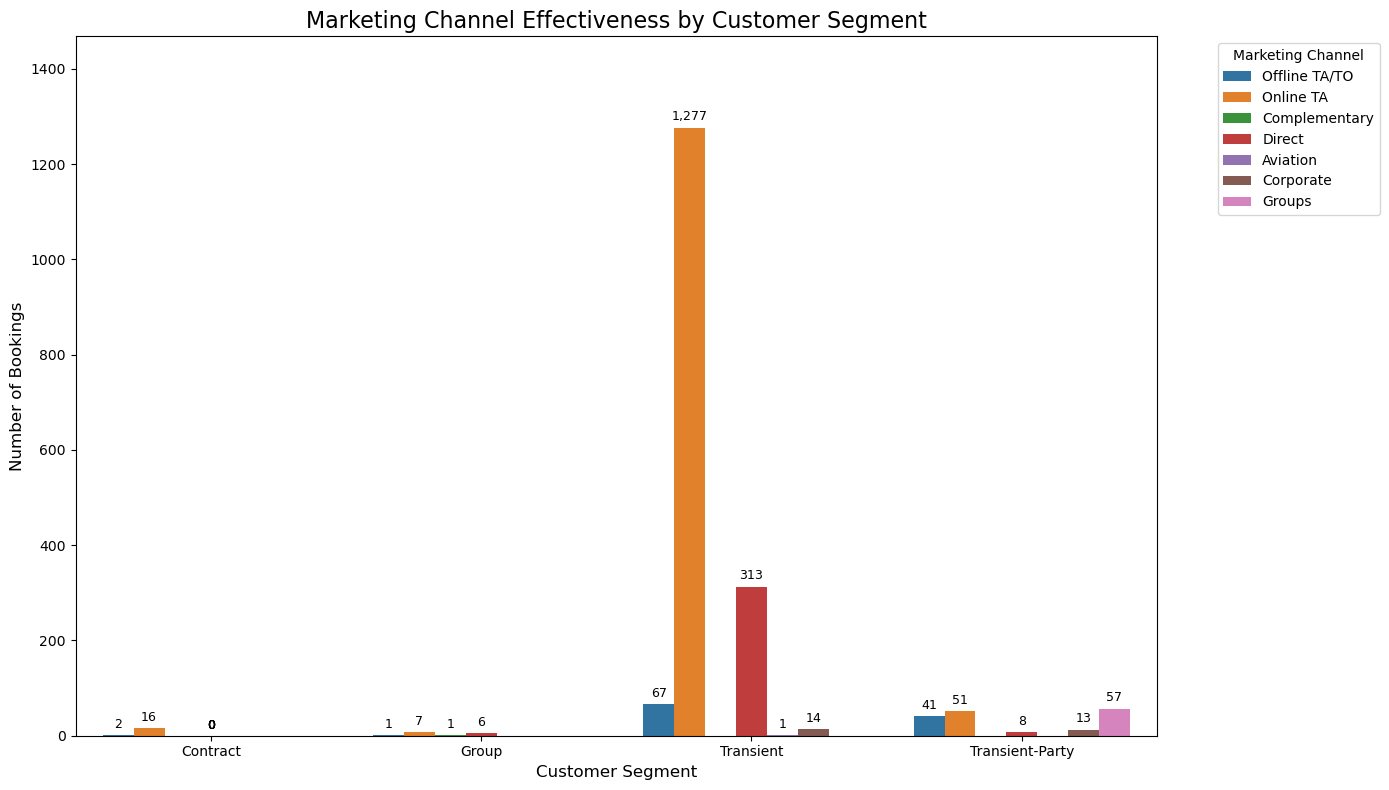

In [57]:
channel_segment_counts = df.groupby(['customer_type', 'market_segment']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))  # Bigger figure
barplot = sns.barplot(
    x='customer_type',
    y='count',
    hue='market_segment',
    data=channel_segment_counts,
    palette='tab10'
)

for p in barplot.patches:
    barplot.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=9, color='black',
        xytext=(0, 3), textcoords='offset points'
    )

plt.title('Marketing Channel Effectiveness by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

max_val = channel_segment_counts['count'].max()
plt.ylim(0, max_val * 1.15)

plt.tight_layout()
plt.show()


TASK 4.3

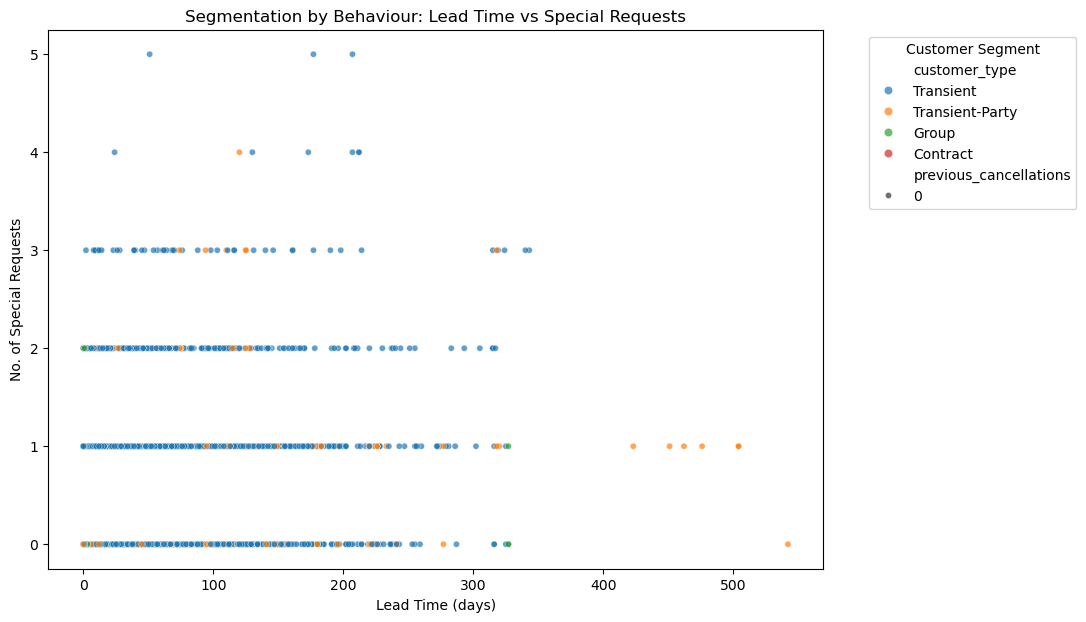

In [62]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x='lead_time',
    y='total_of_special_requests',
    hue='customer_type',
    size='previous_cancellations',
    sizes=(20,200),
    alpha=0.7
)
plt.title('Segmentation by Behaviour: Lead Time vs Special Requests')
plt.xlabel('Lead Time (days)')
plt.ylabel('No. of Special Requests')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


Interpretation:
1. Transient guests: book early & ask for more requests → attract via early-bird offers and personalized upgrades.

2.  Contract/Corporate: short lead time & low requests → retain with loyalty tie-ups and corporate packages.

3.  Group customers: specific room types & agent bookings → use group deals and priority room allocation.

4. Previous cancellations / low lead-time: use as triggers for reminder and retention campaigns.

# TASK 5

TASk 5.1

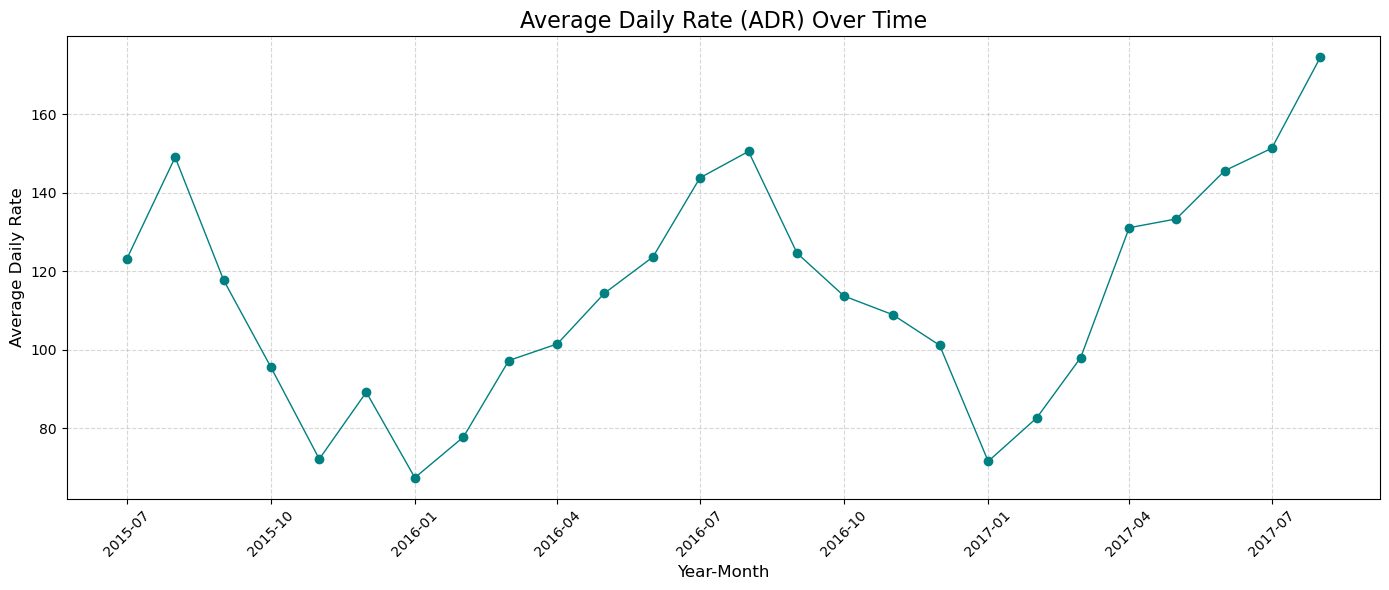

In [68]:
df['adr'] = pd.to_numeric(df['adr'], errors='coerce')

df['year_month'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-01',
    format='%Y-%B-%d', errors='coerce'
)

adr_over_time = df.groupby('year_month')['adr'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(adr_over_time['year_month'], adr_over_time['adr'], marker='o', linewidth=1, color='teal')
plt.title('Average Daily Rate (ADR) Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Daily Rate', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Task 5.2

#### 1. Seasonal & Demand-Based Pricing

Columns used:
arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, lead_time

Strategy:

Peak season: Increase prices during high-demand months (holidays, festivals, weekends).

Low season: Offer discounts or bundled packages to attract bookings.

Advance bookings: Higher prices for last-minute bookings, moderate for early bookings.

Weekend premium: Charge extra for weekend nights.
#### 2. Cancellation-Risk Pricing

Columns used:
is_canceled, previous_cancellations, previous_bookings_not_canceled, lead_time, deposit_type

Strategy:

Customers with high cancellation history → require non-refundable deposits or slightly higher prices.

Offer discounts for non-refundable bookings to secure revenue early.

Increase prices for bookings with very short lead time + high cancellation risk.

#### 3. Room Type-Based Pricing

Columns used:
reserved_room_type, assigned_room_type, booking_changes, total_of_special_requests

Strategy:

Charge higher rates for premium room types & rooms with high demand.

Add fees for last-minute booking changes or room upgrades.

Increase price for rooms with extra amenities or high request count.

#### 4. Guest Segmentation Pricing

Columns used:
market_segment, distribution_channel, customer_type, is_repeated_guest

Strategy:

Loyal/repeated guests → Special offers to increase retention.

Corporate bookings → Bulk booking discounts but keep a minimum margin.

Online travel agency (OTA) bookings → Increase price slightly to offset commission fees.

Direct booking discounts to maximize profit by avoiding third-party fees.

#### 5. Length of Stay-Based Pricing

Columns used:
stays_in_weekend_nights, stays_in_week_nights

Strategy:

Short stays: Slightly higher per-night rates.

Long stays: Offer discounted nightly rates to encourage longer stays (higher total spend).

#### 6. Special Event & Local Demand Pricing

Columns used:
arrival_date_year, arrival_date_month, arrival_date_week_number, country

Strategy:

Increase rates during major local events or holidays.

Adjust prices for guests coming from countries with higher purchasing power.

#### 7. Parking & Special Requests Pricing

Columns used:
required_car_parking_spaces, total_of_special_requests

Strategy:

Charge for parking space usage.

Charge extra for high special request count (e.g., extra beds, early check-in, late checkout).

#### 8. ADR Optimization

Columns used:
adr (Average Daily Rate), is_canceled, lead_time

Strategy:

Track and optimize ADR per season, guest type, and booking channel.

Adjust dynamically using demand forecasting models.

Identify high-demand months & room types.

Find pr
Suggest exact rate changes using data trends.

TASK 5.3

In [74]:
reserved_adr= df.groupby("reserved_room_type")["adr"].mean().sort_values(ascending=False).reset_index()

In [78]:
assigned_adr= df.groupby("assigned_room_type")["adr"].mean().sort_values(ascending=False).reset_index()

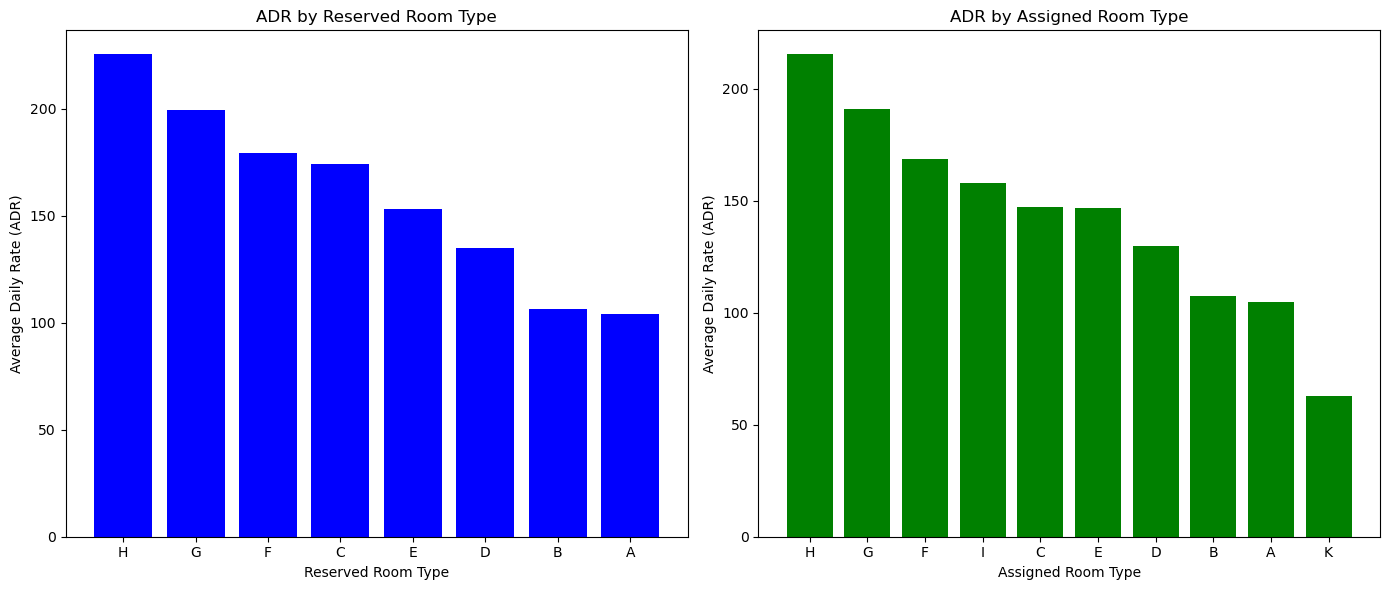

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(reserved_adr["reserved_room_type"], reserved_adr["adr"], color='blue')
axes[0].set_title("ADR by Reserved Room Type")
axes[0].set_xlabel("Reserved Room Type")
axes[0].set_ylabel("Average Daily Rate (ADR)")

axes[1].bar(assigned_adr["assigned_room_type"], assigned_adr["adr"], color='green')
axes[1].set_title("ADR by Assigned Room Type")
axes[1].set_xlabel("Assigned Room Type")
axes[1].set_ylabel("Average Daily Rate (ADR)")

plt.tight_layout()

 # TASK 6

task 6.1

In [85]:
channel_summary = (
    df
    .groupby('distribution_channel')
    .agg(
        total_bookings = ('distribution_channel', 'count'),
        avg_adr = ('adr', 'mean'),
        cancellation_rate = ('is_canceled', 'mean'),  # proportion canceled
        repeat_guest_rate = ('is_repeated_guest', 'mean')
    )
    .sort_values('total_bookings', ascending=False)
)

channel_summary['cancellation_rate'] = channel_summary['cancellation_rate'] * 100
channel_summary['repeat_guest_rate'] = channel_summary['repeat_guest_rate'] * 100

channel_summary

,total_bookings,avg_adr,cancellation_rate,repeat_guest_rate
distribution_channel,,,,
TA/TO,1495,122.718716,27.224080,0.668896
Direct,326,140.767546,12.269939,2.147239
Corporate,33,102.665455,0.000000,6.060606
GDS,21,136.801429,57.142857,0.000000


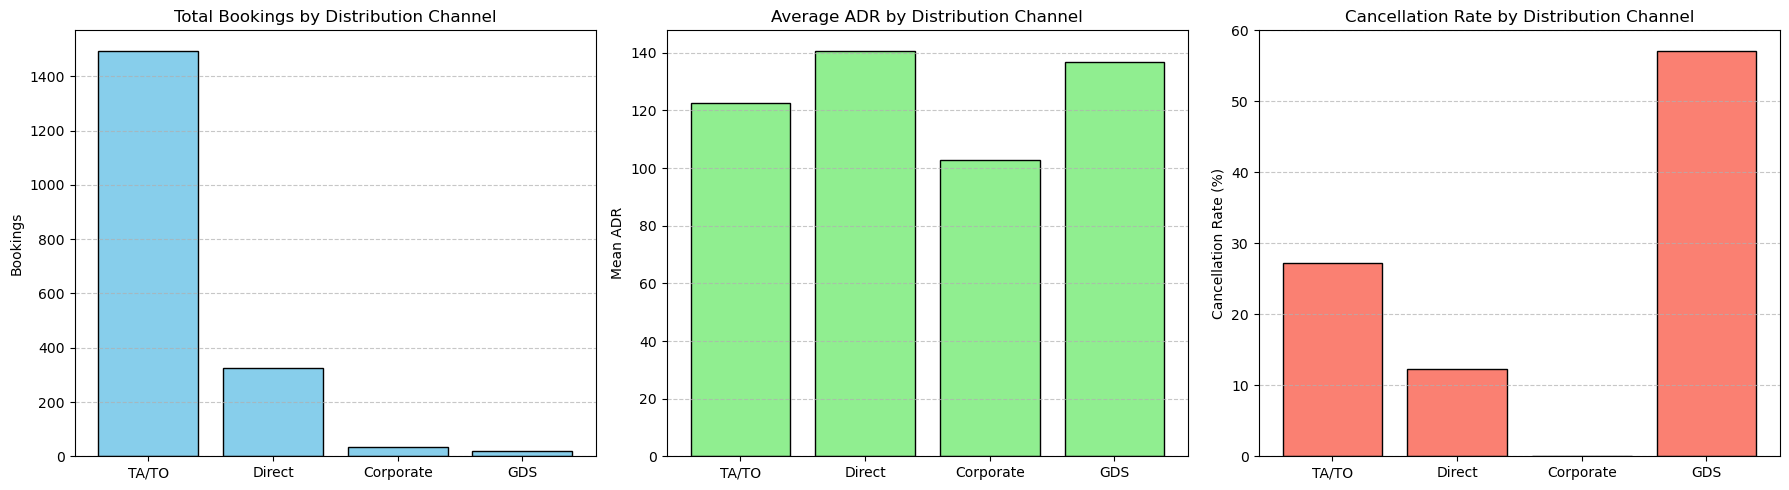

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(channel_summary.index, channel_summary['total_bookings'], color='skyblue', edgecolor='black')
axes[0].set_title('Total Bookings by Distribution Channel')
axes[0].set_ylabel('Bookings')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(channel_summary.index, channel_summary['avg_adr'], color='lightgreen', edgecolor='black')
axes[1].set_title('Average ADR by Distribution Channel')
axes[1].set_ylabel('Mean ADR')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

axes[2].bar(channel_summary.index, channel_summary['cancellation_rate'], color='salmon', edgecolor='black')
axes[2].set_title('Cancellation Rate by Distribution Channel')
axes[2].set_ylabel('Cancellation Rate (%)')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

task 6.2

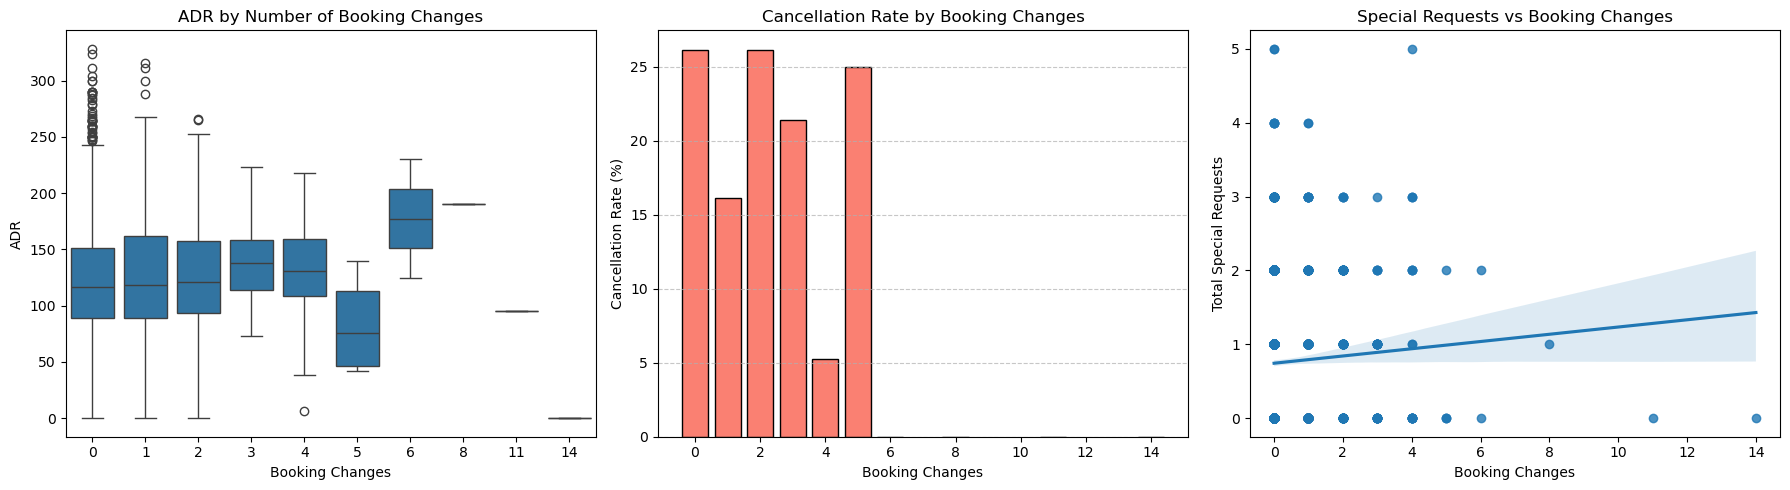

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='booking_changes', y='adr', data=df, ax=axes[0])
axes[0].set_title('ADR by Number of Booking Changes')
axes[0].set_xlabel('Booking Changes')
axes[0].set_ylabel('ADR')

cancel_rate = df.groupby('booking_changes')['is_canceled'].mean() * 100
axes[1].bar(cancel_rate.index, cancel_rate.values, color='salmon', edgecolor='black')
axes[1].set_title('Cancellation Rate by Booking Changes')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].set_xlabel('Booking Changes')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.regplot(x='booking_changes', y='total_of_special_requests', data=df, ax=axes[2])
axes[2].set_title('Special Requests vs Booking Changes')
axes[2].set_xlabel('Booking Changes')
axes[2].set_ylabel('Total Special Requests')

plt.tight_layout()
plt.show()

task 6.3

Correlation between waiting list days and cancellation: -0.031


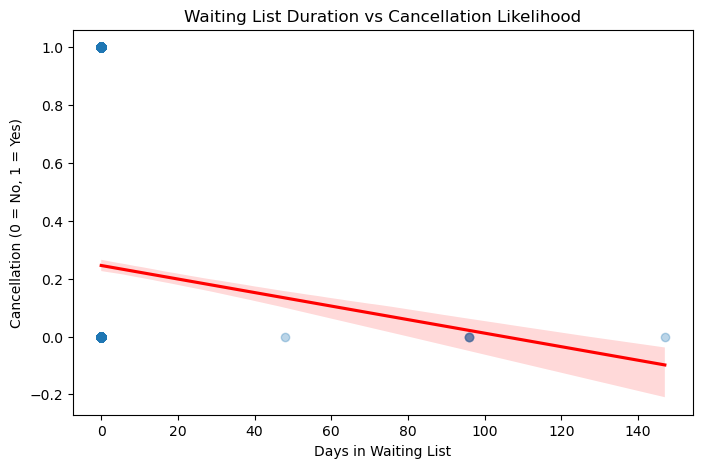

In [98]:
correlation = df['days_in_waiting_list'].corr(df['is_canceled'])
print(f"Correlation between waiting list days and cancellation: {correlation:.3f}")

plt.figure(figsize=(8,5))
sns.regplot(x='days_in_waiting_list', y='is_canceled', data=df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Waiting List Duration vs Cancellation Likelihood')
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation (0 = No, 1 = Yes)')
plt.show()

# TASK 7

task 7.1

In [103]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

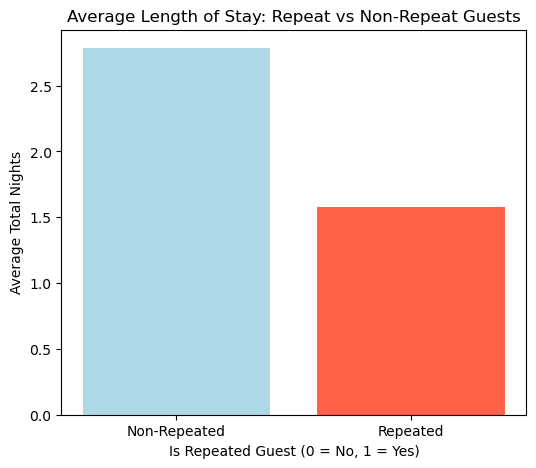

In [105]:
avg_nights = df.groupby('is_repeated_guest')['total_nights'].mean()

plt.figure(figsize=(6,5))
plt.bar(avg_nights.index, avg_nights.values, color=['lightblue', 'tomato'])
plt.title('Average Length of Stay: Repeat vs Non-Repeat Guests')
plt.xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Average Total Nights')
plt.xticks([0,1], ['Non-Repeated', 'Repeated'])
plt.show()


Task 7.2

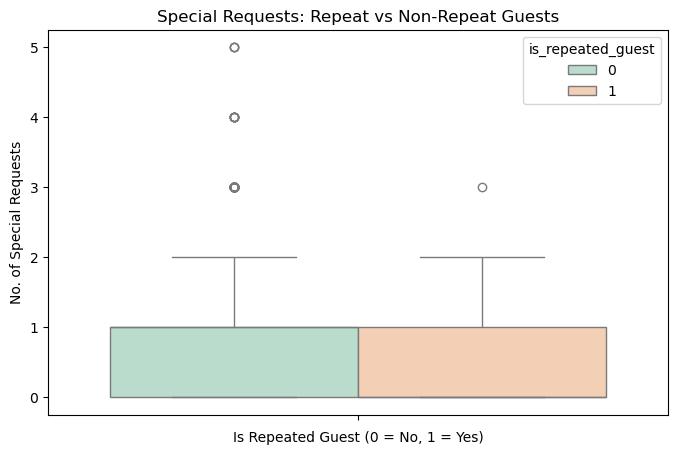

In [110]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    hue='is_repeated_guest',
    y='total_of_special_requests',
    palette='Pastel2'
)
plt.title('Special Requests: Repeat vs Non-Repeat Guests')
plt.xlabel('Is Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('No. of Special Requests')
plt.show()


Task 7.3

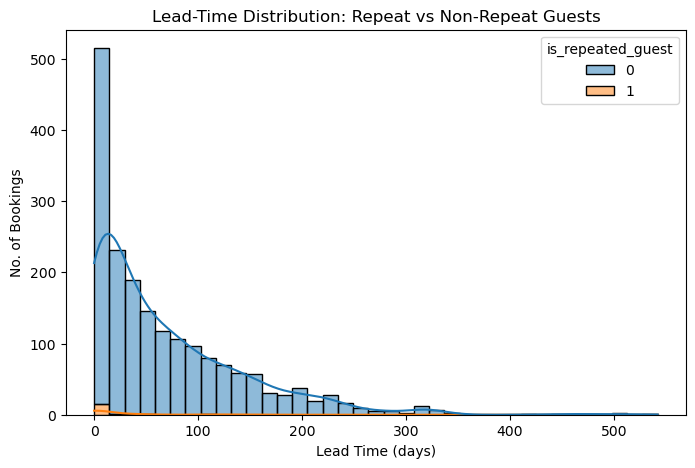

In [115]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='lead_time',
    hue='is_repeated_guest',
    kde=True,
    multiple='stack'
)
plt.title('Lead-Time Distribution: Repeat vs Non-Repeat Guests')
plt.xlabel('Lead Time (days)')
plt.ylabel('No. of Bookings')
plt.show()
